# Pointcloud Demo
This demonstration notebook uses code from https://github.com/heliophysicsPy/summer-school-24/tree/main/pysat-tutorial.

In [39]:
# import packages
import pandas as pd
import pysat
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import warnings
from harkness.create_ply import create_ply
warnings.filterwarnings("ignore", message="'S' is deprecated and will be removed in a future version, please use 's' instead.")

pd.set_option('display.max_columns', None)

## Download data
As an example, we'll visualize ICON data during the 2020 Tonga eruption. First, let's download the data we're interested in using pysat and put it into pandas dataframes. 

In [2]:
# Set range of dates for downloading ICON data
start_download_date = dt.datetime(2020, 12, 19)
stop_download_date = dt.datetime(2020, 12, 24)

In [3]:
# Set data directory if user hasn't already set one
print(f"old: {pysat.params['data_dirs']}")
if len(pysat.params['data_dirs']) == 0 or pysat.params['data_dirs'] == ['.']:
    # Set a directory for pysat to use for data
    pysat.params['data_dirs'] = 'output/'
else:
    print('pysat directory has been set previously. Leaving unchanged.')

print(f"new: {pysat.params['data_dirs']}")

old: ['output']
pysat directory has been set previously. Leaving unchanged.
new: ['output']


### IVM
We want to see the following properties: 
```
'IVM': 'Altitude', 'Latitude', 'Longitude',
                     'Ion_Velocity_Field_Aligned',
                     'Ion_Velocity_Meridional', 'Ion_Velocity_Zonal',
                     'Fractional_Ion_Density_H', 'Fractional_Ion_Density_O',
                     'Ion_Density', 'Ion_Temperature']
```




In [18]:
# # Instantiate IVM Instrument object. IVM data is automatically cleaned using
# # instrument flags as it is loaded. Levels of 'clean', 'dusty', 'dirty', and
# # 'none' or None are supported. This is generally true for all pysat instruments
ivm = pysat.Instrument('icon', 'ivm', inst_id='a', clean_level='clean')

# # Download data from NASA CDAWeb.

# # If you would like additional feedback while pysat performs operations
# # uncomment the line below.
# pysat.logger.setLevel("INFO")

# # Download data between specific dates. We shouldn't need to do this today
# ivm.download(start_download_date, stop_download_date)

# # To get all of the latest files on the server but not on
# # the local machine, uncomment line below.
# # The version and revision numbers in the filenames are used to identify
# # the latest files. This works for all ICON instruments.
# # ivm.download_updated_files()

# # Resume limited feedback
# pysat.logger.setLevel("WARNING")

ivm.load(date = start_download_date, end_date = stop_download_date)

In [38]:
ivm.data['Footpoint_Latitude_North']
ivm.data['Footpoint_Longitude_North']
ivm.data['Footpoint_Altitude_North']


Epoch
2020-12-19 00:00:00.454    120.0
2020-12-19 00:00:01.454    120.0
2020-12-19 00:00:02.454    120.0
2020-12-19 00:00:03.454    120.0
2020-12-19 00:00:04.454    120.0
                           ...  
2020-12-23 23:59:55.651    120.0
2020-12-23 23:59:56.651    120.0
2020-12-23 23:59:57.651    120.0
2020-12-23 23:59:58.651    120.0
2020-12-23 23:59:59.651    120.0
Name: Footpoint_Altitude_North, Length: 432000, dtype: float32

In [29]:
pd.set_option('display.max_columns', None)
# ivm.data.columns
print(ivm.data.describe())


          A_Activity       A_Status       Altitude    Apex_Height  \
count  432000.000000  432000.000000  432000.000000  432000.000000   
mean      238.738409     238.738409     592.280334    1676.666504   
std        66.396632      66.396632       8.877977    1089.773315   
min         1.000000       1.000000     576.667419     576.796387   
25%       257.000000     257.000000     583.630890     804.058136   
50%       257.000000     257.000000     593.782837    1317.901672   
75%       258.000000     258.000000     600.904800    2217.852112   
max       258.000000     258.000000     605.138428    4800.344727   

       Attitude_Status     B_Activity       B_Status        DM_Flag  \
count    432000.000000  432000.000000  432000.000000  432000.000000   
mean          8.625482     238.738409     238.738409       0.996611   
std          58.317507      66.396632      66.396632       1.308787   
min           5.000000       1.000000       1.000000       0.000000   
25%           5.000000 

In [11]:
# help(pysat.Instrument)

### MIGHTI 
We want to see the following parameters:
```
'MIGHTI': 'Epoch', 'Altitude', 'Latitude', 'Longitude',
                    'Magnetic_Field_Aligned_Wind',
                    'Magnetic_Meridional_Wind', 'Magnetic_Zonal_Wind',
                    'Meridional_Wind', 'Meridional_Wind_Error',
                    'Zonal_Wind', 'Zonal_Wind_Error'
```

In [6]:
# Register instruments with pysat. Only needed once per install.
import pysatNASA
pysat.utils.registry.register(['pysatNASA.instruments.icon_mighti'])

# Improvements for loading ICON metadata are currently in
# https://github.com/pysat/pysatNASA/pull/100.
warnings.simplefilter('ignore', UserWarning)

# First, obtain MIGHTI data from NASA CDAWeb.

# Instantiate pysat.Instrument objects for the MIGHTI data products
# MIGHTI Vector wind red.
mighti_vw_red = pysat.Instrument('icon', 'mighti', tag='vector_wind_red',
                                 inst_id='vector')

# MIGHTI Vector wind green.
mighti_vw_green = pysat.Instrument('icon', 'mighti', tag='vector_wind_green',
                                   inst_id='vector')

# MIGHTI Temperature.
mighti_temp_a = pysat.Instrument('icon', 'mighti', tag='temperature',
                                 inst_id='a')
mighti_temp_b = pysat.Instrument('icon', 'mighti', tag='temperature',
                                 inst_id='b')

# Collect into a list.
mighti_insts = [mighti_vw_red, mighti_vw_green, mighti_temp_a, mighti_temp_b]

In [7]:
# # Download various MIGHTI data products

# # If needed, change levels for logging printout to increase feedback.
# # More information about logging may be found here:
# # https://docs.python.org/3/library/logging.html
# pysat.logger.setLevel("INFO")

# # Perform download for each dataset. Data is already downloaded for the workshop
# for inst in mighti_insts:
#     inst.download(start_download_date, stop_download_date)
    
# # Change levels for logging printout to decrease feedback
# pysat.logger.setLevel("WARNING")

## Visualize in 2D

In [17]:
# # Make basic time series plot of Ion Density
# ivm = pysat.Instrument('icon', 'ivm', inst_id='a')

# # Load day of data
# # ivm.load(2020, 355)
ivm.load(date = start_download_date, end_date = stop_download_date)

# # Basic plot of ion density
# ivm['Ion_Density'].plot()
# plt.title('ICON IVM Ion Density')
# plt.ylabel('Ion Density (N/cc)')

# # Basic plot of the log of ion density
# plt.figure()
# np.log10(ivm['Ion_Density']).plot()
# plt.title('ICON IVM Log Ion Density')
# plt.ylabel('Log Ion Density (N/cc)')

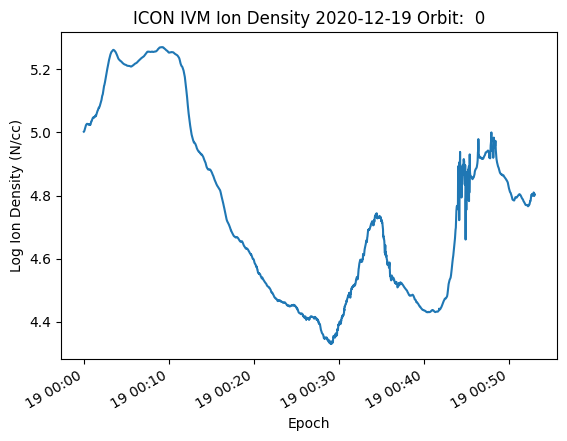

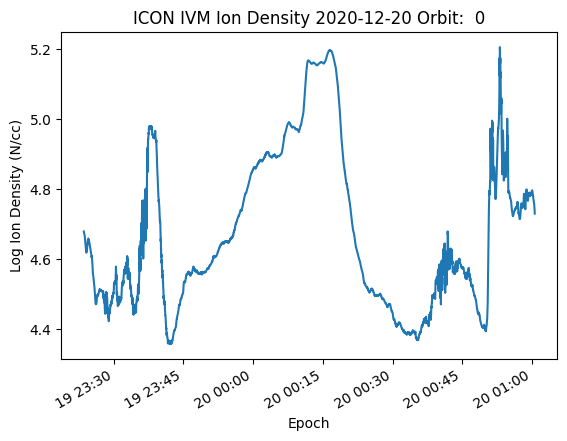

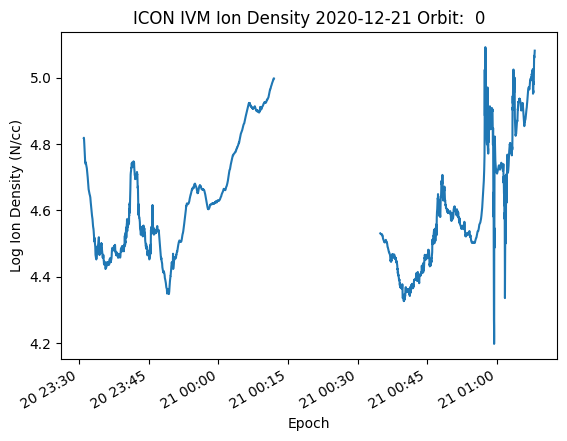

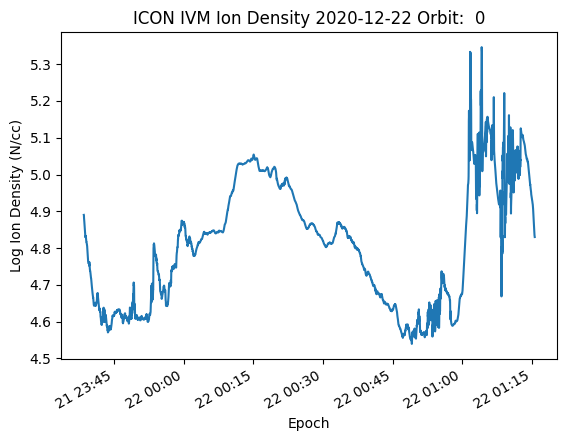

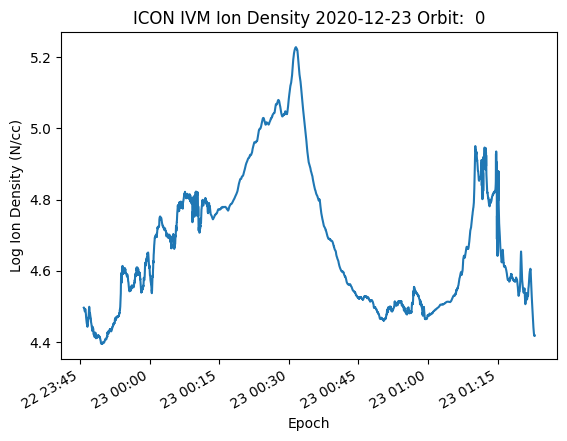

In [42]:
# Produce ion density plots orbit-by-orbit.
# While ICON products include an orbit number based upon the position of the
# spacecraft this breakdown does not produce a geophysical organization
# of the data.

# We demonstrate using pysat to parse the data orbit-by-orbit using Magnetic
# Local Time (MLT) values in the file to make orbits between 0-24 MLT.

# Set date for plotting IVM data
date = start_download_date

# pysat is able to calculate orbit breaks in real-time.
# Setup parameters for pysat to use when determining orbits
orbit_info = {'kind': 'lt', 'index':'Magnetic_Local_Time'}
# 'kind' sets the type of orbit breakdown, lt for local time.
# 'index' sets the variable that will be used for determining orbit breaks.
# The expected period may also be set, defaults to a 97 minute LEO period.

# Instantiate ICON IVM Instrument object with orbit information
ivm = pysat.Instrument('icon', 'ivm', inst_id='a', clean_level='clean', 
                       orbit_info=orbit_info)


# Set the start and stop dates when iterating over Instrument object.
# By default, pysat will iterate over all available data.
# Two days chosen here to demonstrate orbits cross file and day boundaries.
ivm.bounds = (None, date + dt.timedelta(days=4))

ivm.load(date=date)
# Iterate over the IVM data orbit-by-orbit. Each loop, a single orbit of
# data is available in ivm.data.
for livm in ivm.orbits:
    if livm.orbits.current == 0:
        # Only plot the first orbit of each day.
        plt.figure()
        np.log10(livm['Ion_Density']).plot()
        title = ''.join(['ICON IVM Ion Density {date:s} Orbit: {num:2d}',
                         '']).format(date=livm.date.strftime('%Y-%m-%d'),
                                     num=livm.orbits.current)
        plt.ylabel('Log Ion Density (N/cc)')
        plt.title(title)


In [43]:
help(ivm.orbits)

Help on Orbits in module pysat._orbits object:

class Orbits(builtins.object)
 |  Orbits(inst, index=None, kind='local time', period=None)
 |  
 |  Determine orbits on the fly and provide orbital data in `.data`.
 |  
 |  Parameters
 |  ----------
 |  inst : pysat.Instrument
 |      Instrument object for which the orbits will be determined
 |  index : str or NoneType
 |      Name of the data series to use for determining orbit breaks
 |      (default=None)
 |  kind : str
 |      Kind of orbit, which specifies how orbital breaks are determined.
 |      Expects one of: 'local time', 'longitude', 'polar', or 'orbit'
 |      - local time: negative gradients in lt or breaks in inst.data.index
 |      - longitude: negative gradients or breaks in inst.data.index
 |      - polar: zero crossings in latitude or breaks in inst.data.index
 |      - orbit: uses unique values of orbit number
 |      (default='local time')
 |  period : np.timedelta64 or NoneType
 |      length of time for orbital per

## Visualize with harkness
An easy way to visualize satellite data is to create a pointcloud with points at the locations expressed by the satellite coordinates, colormapped according to parameters of interest. This pointcloud can be visualized on a computer monitor with CloudCompare, or opened up in VR using VRifier or VR Point Cloud Editor.

### Convert downloaded data to pandas dataframes

In [ ]:
# /TODO
mighti = pysat.Instrument('icon', 'mighti')

In [ ]:
df_ivm = ivm.data.head(10)

In [ ]:
df_ivm.columns

### Generate pointclouds using harkness

In [46]:
ivm.data['Latitude']
ivm.data['Longitude']
ivm.data['Altitude']

Epoch
2020-12-23 23:53:08.655    581.793152
2020-12-23 23:53:09.655    581.799072
2020-12-23 23:53:10.655    581.804993
2020-12-23 23:53:11.655    581.810913
2020-12-23 23:53:12.655    581.816833
                              ...    
2020-12-23 23:59:55.651    584.972961
2020-12-23 23:59:56.651    584.972961
2020-12-23 23:59:57.651    584.977478
2020-12-23 23:59:58.651    584.986511
2020-12-23 23:59:59.651    584.995605
Name: Altitude, Length: 412, dtype: float32

In [68]:
# import pandas as pd
# from math import radians, cos, sin

# def convert_to_cartesian(df, earth_radius=6371e3):
#   """
#   Converts 'Latitude', 'Longitude', 'Altitude' columns to 'X', 'Y', 'Z' (Cartesian) in a pandas dataframe.
#   Z-axis runs between the Earth's geographic poles.

#   Args:
#       df (pd.DataFrame): The pandas dataframe containing the columns to convert.
#       earth_radius (float, optional): Earth's radius in meters (default: 6371e3).

#   Returns:
#       pd.DataFrame: The modified dataframe with new 'X', 'Y', 'Z' columns.

#   Raises:
#       ValueError: If the dataframe doesn't contain the required columns.
#   """
#   # Check if required columns exist
#   required_columns = ['Latitude', 'Longitude', 'Altitude']
#   if not all(col in df.columns for col in required_columns):
#     raise ValueError(f"Dataframe must contain columns: {', '.join(required_columns)}")

#   # Convert coordinates to radians using apply
#   df['Latitude'] = df['Latitude'].apply(radians)
#   df['Longitude'] = df['Longitude'].apply(radians)

#   # Earth radius (adjust if needed)
#   R = earth_radius

#   # Conversion using trigonometric functions
#   df['X'] = R * cos(df['Latitude']) * cos(df['Longitude'])
#   df['Y'] = R * cos(df['Latitude']) * sin(df['Longitude'])
#   df['Z'] = R * sin(df['Latitude'])

#   return df


In [63]:
df.columns

Index(['A_Activity', 'A_Status', 'Altitude', 'Apex_Height', 'Attitude_Status',
       'B_Activity', 'B_Status', 'DM_Flag', 'DM_Flag_Process',
       'Equator_Ion_Velocity_Meridional',
       ...
       'Unit_Vector_Y_Up', 'Unit_Vector_Z_East', 'Unit_Vector_Z_North',
       'Unit_Vector_Z_Up', 'Unit_Vector_Zonal_X', 'Unit_Vector_Zonal_Y',
       'Unit_Vector_Zonal_Z', 'X', 'Y', 'Z'],
      dtype='object', length=116)

In [85]:
from spacepy import coordinates as coord
cvals = coord.Coords([[1,2,4],[1,2,2]], 'GEO', 'car')
cvals.x  # returns all x coordinates

array([1., 1.])

In [79]:
df['Latitude'][1]

-0.005772879159207821

In [90]:
df['X']

Epoch
2020-12-23 23:53:08.655    8.492998e+05
2020-12-23 23:53:09.655    8.557343e+05
2020-12-23 23:53:10.655    8.621723e+05
2020-12-23 23:53:11.655    8.686100e+05
2020-12-23 23:53:12.655    3.861928e-03
                               ...     
2020-12-23 23:59:55.651    3.620160e+06
2020-12-23 23:59:56.651    3.620160e+06
2020-12-23 23:59:57.651    3.623715e+06
2020-12-23 23:59:58.651    3.630820e+06
2020-12-23 23:59:59.651    3.637925e+06
Name: X, Length: 412, dtype: float64

In [104]:
# # # coord.sph2car([1, 2, 3])
# # for i in range(len(df)):
# #     df['X'][i]=coord.sph2car([df['Latitude'][i], df['Longitude'][i], df['Altitude'][i]])[0]
# #     df['Y'][i]=coord.sph2car([df['Latitude'][i], df['Longitude'][i], df['Altitude'][i]])[1]
# #     df['Y'][i]=coord.sph2car([df['Latitude'][i], df['Longitude'][i], df['Altitude'][i]])[2]

# df[['X', 'Y', 'Z']] = pd.DataFrame(coord.sph2car(df['Latitude', 'Longitude', 'Altitude']), columns=['X', 'Y', 'Z'])
# df['X'][4]

In [107]:
# Extract coordinates as separate lists
latitudes = df['Latitude'].tolist()
longitudes = df['Longitude'].tolist()
altitudes = df['Altitude'].tolist()

# Combine coordinates into a list of lists for sph2car
spherical_coords = list(zip(latitudes, longitudes, altitudes))

# Use sph2car to convert to Cartesian coordinates
cartesian_coords = coord.sph2car(spherical_coords)

# Unpack Cartesian coordinates into separate lists
x, y, z = zip(*cartesian_coords)  # * unpacks the results from sph2car

# Add new columns to DataFrame
# df['X'] = x
# df['Y'] = y
# df['Z'] = z
df = df.assign(X=x, Y=y, Z=z)

print(df['X'])

Epoch
2020-12-23 23:53:08.655    0.004299
2020-12-23 23:53:09.655    0.004304
2020-12-23 23:53:10.655    0.004308
2020-12-23 23:53:11.655    0.004312
2020-12-23 23:53:12.655    0.004317
                             ...   
2020-12-23 23:59:55.651    0.005497
2020-12-23 23:59:56.651    0.005497
2020-12-23 23:59:57.651    0.005498
2020-12-23 23:59:58.651    0.005499
2020-12-23 23:59:59.651    0.005501
Name: X, Length: 412, dtype: float64


In [109]:
print(df.columns)

Index(['A_Activity', 'A_Status', 'Altitude', 'Apex_Height', 'Attitude_Status',
       'B_Activity', 'B_Status', 'DM_Flag', 'DM_Flag_Process',
       'Equator_Ion_Velocity_Meridional',
       ...
       'Unit_Vector_Y_Up', 'Unit_Vector_Z_East', 'Unit_Vector_Z_North',
       'Unit_Vector_Z_Up', 'Unit_Vector_Zonal_X', 'Unit_Vector_Zonal_Y',
       'Unit_Vector_Zonal_Z', 'X', 'Y', 'Z'],
      dtype='object', length=116)


In [111]:
filename = 'output/test.ply'
create_ply(df, filename, C='A_Activity', X='X', Y='Y', Z='Z', cmap='viridis', is_verbose=False)

In [41]:
help(create_ply)

Help on function create_ply in module harkness.create_ply:

create_ply(df, filename, C='C', X='X', Y='Y', Z='Z', cmap='viridis', is_verbose=False)
    Create a PLY file from a pandas DataFrame with columns X, Y, Z, and C.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the point cloud data.
    filename (str): The filename for the PLY file.
    C: The column of df associated with color; can be numeric or categorical.
    X, Y, Z: column names associated with X, Y and Z. XYZ by default.
    cmap: The matplotlib colormap used for the .ply file. 'viridis' by default.
    is_verbose: Boolean for printing debug text.



### Visualize in Jupyter notebook

In [ ]:
# from open3d import *    

# def main():
#     cloud = io.read_point_cloud("output.ply") # Read point cloud
#     visualization.draw_geometries([cloud])    # Visualize point cloud      

# if __name__ == "__main__":
#     main()